In [22]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import GCCA, shuffle_block, data_superbowl, corr_component, avg_corr_coe
from sklearn.covariance import LedoitWolf
from numpy import linalg as LA
from scipy import signal
from tqdm import tqdm

In [23]:
data = scipy.io.loadmat('../Correlated Component Analysis/data/Prepro_EEG.mat')
X_prepro = data['X']
fs = 256
T, D, N = X_prepro.shape

In [24]:
# head = '../Correlated Component Analysis/data'
# datatype = 'preprocessed'
# year = '2013'
# view = 'Y2'
# X_prepro, fs = data_superbowl(head=head, datatype=datatype, year=year, view=view)
# T, D, N = X_prepro.shape

In [25]:
n_components = 100
lam, W_stack, avg_corr = GCCA(X_prepro, n_components=n_components, regularization='lwcov')
avg_corr

array([0.12260455, 0.11334059, 0.11054806, 0.11039175, 0.10463954,
       0.10302433, 0.10027871, 0.09845975, 0.09867814, 0.09705087,
       0.09515674, 0.09389954, 0.09351976, 0.09300543, 0.09211686,
       0.09199498, 0.09149703, 0.09144276, 0.08991871, 0.08802897,
       0.08804947, 0.08558954, 0.08495739, 0.08483975, 0.08429723,
       0.08244482, 0.08146933, 0.08197158, 0.0815693 , 0.08012368,
       0.07919969, 0.0790859 , 0.07892935, 0.0782644 , 0.07710249,
       0.07692731, 0.07580415, 0.07587114, 0.07454033, 0.0736801 ,
       0.07320397, 0.07216984, 0.07221503, 0.07144573, 0.07123717,
       0.07078465, 0.06987352, 0.07016995, 0.06834826, 0.06818223,
       0.06756195, 0.06742494, 0.06717322, 0.06594255, 0.06564443,
       0.06489244, 0.06489023, 0.06407649, 0.06378828, 0.06323114,
       0.06273594, 0.06235996, 0.06200299, 0.06173626, 0.06117923,
       0.0602398 , 0.06053636, 0.05951868, 0.05882504, 0.05892487,
       0.05769609, 0.0577133 , 0.05778799, 0.05743075, 0.05665

In [26]:
avg_corr_coe(X_prepro, W_stack, N, n_components=n_components)

array([0.12449273, 0.11564272, 0.11281938, 0.11250282, 0.10683119,
       0.1050767 , 0.10258971, 0.10058677, 0.10078441, 0.09910628,
       0.09726383, 0.09589519, 0.09571764, 0.09497647, 0.09418806,
       0.0939536 , 0.09360273, 0.09353501, 0.09185125, 0.09001503,
       0.09000949, 0.08742488, 0.08676321, 0.08682927, 0.08624751,
       0.08427709, 0.08328926, 0.08377679, 0.08357136, 0.08192261,
       0.0811159 , 0.08085797, 0.08060084, 0.07998901, 0.07888401,
       0.07871409, 0.07757962, 0.07757756, 0.07629349, 0.07539599,
       0.07489563, 0.0739896 , 0.07383697, 0.0730746 , 0.07296149,
       0.07240425, 0.07160511, 0.07191695, 0.06983186, 0.06962498,
       0.06910373, 0.06910789, 0.06879092, 0.06737531, 0.06723982,
       0.06639193, 0.06635482, 0.06564124, 0.06521684, 0.06472043,
       0.06418077, 0.06384038, 0.06347221, 0.0631736 , 0.06267122,
       0.06154757, 0.06189815, 0.06081032, 0.0602602 , 0.06027493,
       0.05908108, 0.05899061, 0.05904892, 0.05868016, 0.05798

In [27]:
(1/lam-1)/(N-1)

array([0.12434029, 0.11556644, 0.1144001 , 0.11268614, 0.1070146 ,
       0.10434564, 0.10338931, 0.10046876, 0.09995568, 0.09990031,
       0.09679073, 0.09577409, 0.09515005, 0.09443026, 0.09388135,
       0.09303274, 0.09284607, 0.09257245, 0.09126764, 0.08901212,
       0.08864086, 0.08694185, 0.08615279, 0.08592975, 0.08545251,
       0.08411826, 0.08338778, 0.08304739, 0.08273858, 0.08142817,
       0.08065327, 0.08006926, 0.07984124, 0.07942499, 0.07811925,
       0.07786667, 0.07687651, 0.07654669, 0.07517941, 0.07479677,
       0.07404851, 0.07357222, 0.07311704, 0.07237171, 0.07204564,
       0.07167271, 0.07098977, 0.07072494, 0.0696081 , 0.06911589,
       0.06836251, 0.06799856, 0.06777757, 0.06685758, 0.06653291,
       0.06615527, 0.06553152, 0.06506649, 0.06470077, 0.06409557,
       0.06359634, 0.06325523, 0.06295382, 0.06238661, 0.06171847,
       0.06149556, 0.06108873, 0.0605623 , 0.05989755, 0.05948835,
       0.05877758, 0.05857621, 0.05837969, 0.05808594, 0.05751

Difference between avg_corr and the one computed by function `avg_corr_coe` is due to the regularization when computing covariance matrices.

(1/lam-1)/(N-1) is an approximation of real average pairwise correlation. It assumes that $\mathbf w_n^H \mathbf R_{\mathbf x_n \mathbf x_n} \mathbf w_n$ is equal for all $n$ (different subject), which is not true. In all cases we have here, this approximation is actually good enough.

In [28]:
# Reference value
X_single_channel = X_prepro[:,10,:]
corr_mtx = np.corrcoef(X_single_channel, rowvar=False)
np.sum(corr_mtx-np.eye(N))/N/(N-1)

0.02490478108592388

### Permutation Test

In [8]:
num_test = 100
corr_topK = np.empty((0, n_components))
for i in tqdm(range(num_test)):
    X_shuffled = shuffle_block(X_prepro, t=3, fs=fs)
    _, _, corr_permu = GCCA(X_shuffled, n_components=n_components, regularization='lwcov')
    # _, _, corr_permu = GCCA(X_shuffled, n_components=n_components, regularization='lwcov', W_train=W_stack)
    corr_topK = np.concatenate((corr_topK, np.expand_dims(corr_permu, axis=0)), axis=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [14:15<00:00,  8.56s/it]


Component 1, top 0.0%


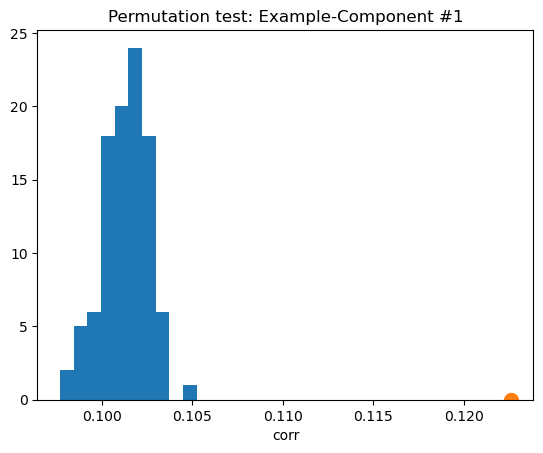

In [9]:
compo = 1
signifi = sum(corr_topK[:,0]>avg_corr[compo-1])/num_test*100
print("Component {compo}, top {signifi}%".format(compo=compo, signifi=signifi))
plt.hist(corr_topK[:,0])
plt.title('Permutation test: Example-'+'Component #'+str(compo))
# plt.title('Permutation test: Superbowl-'+datatype+'-'+year+'-'+view+'-'+'Component #'+str(compo))
plt.xlabel('corr')
plt.plot(avg_corr[compo-1], 0, marker="o", markersize=10)

### Cross-validation

In [29]:
fold = 10
cv_n_components = 5
corr_train = np.zeros((fold, cv_n_components))
corr_test = np.zeros_like(corr_train)
T, D, N = X_prepro.shape
for i in range(fold):
    len_test = T // fold
    X_test = X_prepro[len_test*i:len_test*(i+1),:,:]
    X_train = np.delete(X_prepro, range(len_test*i, len_test*(i+1)), axis=0)
    _, W_train, corr_train[i,:] = GCCA(X_train, n_components=cv_n_components, regularization='lwcov')
    # corr_train[i,:] = avg_corr_coe(X_train, W_train, N, n_components=cv_n_components)
    _, _, corr_test[i,:] = GCCA(X_test, n_components=cv_n_components, regularization='lwcov', W_train=W_train)

In [30]:
np.mean(corr_train, axis=0)

array([0.12882401, 0.12098105, 0.11829638, 0.11620297, 0.11211726])

In [31]:
np.mean(corr_test, axis=0)

array([0.01916707, 0.00462971, 0.0070183 , 0.01117539, 0.00070067])

### GCCA vs Correlated Component Analysis

In [14]:
fold = 10
cv_n_components = 5
ISC_train = np.zeros((fold, cv_n_components))
ISC_test = np.zeros_like(ISC_train)
T, D, N = X_prepro.shape
for i in range(fold):
    len_test = T // fold
    X_test = X_prepro[len_test*i:len_test*(i+1),:,:]
    X_train = np.delete(X_prepro, range(len_test*i, len_test*(i+1)), axis=0)
    ISC_train[i,:], W_train = corr_component(X_train, n_components=cv_n_components)
    ISC_test[i,:], _ = corr_component(X_test, n_components=cv_n_components, W_train=W_train)

In [15]:
np.mean(ISC_train, axis=0)

array([0.05022358, 0.02988394, 0.02490273, 0.01870672, 0.01760152])

In [16]:
np.mean(ISC_test, axis=0)

array([ 0.04280363,  0.02148039,  0.01509772, -0.00111595,  0.00240869])